In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [9]:
# Find the most recent date in the data set.


('2017-08-23')

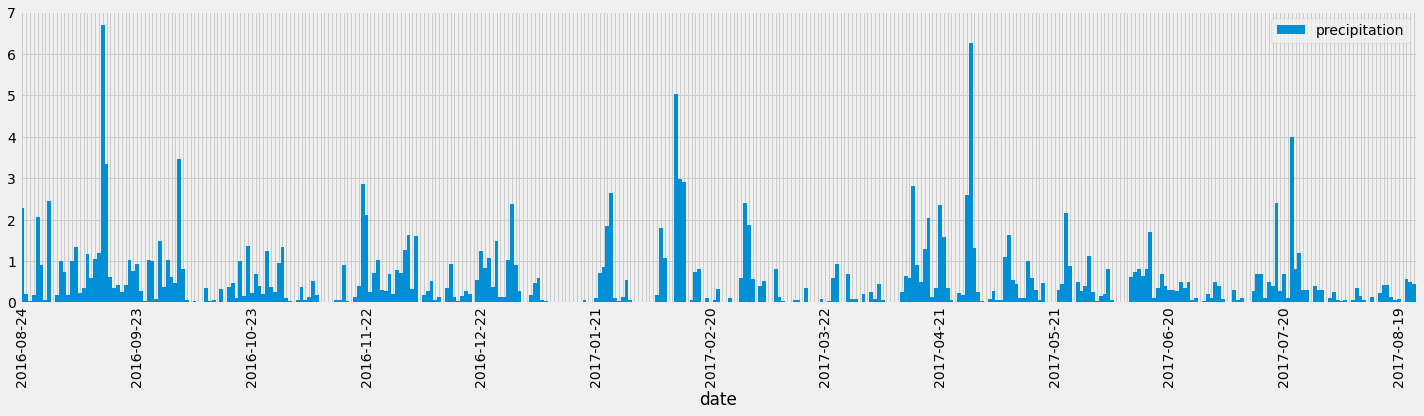

In [10]:
sel = [Measurement.date, func.max(Measurement.prcp)]
prcpLY = session.query(*sel).filter(Measurement.date > dt.date(2016,8,23)).group_by(Measurement.date).\
    order_by(Measurement.date).all()
df = pd.DataFrame(prcpLY, columns = ['date','precipitation'])
df.set_index('date',inplace=True)
ax=df.plot(kind='bar', figsize=(20,6), width=1, rot=90)

#Next 6 lines mostly copied from https://pretagteam.com/question/change-frequency-of-xaxis-tick-label-of-datetime-data-in-python-bar-chart-using-matplotlib
ticklabels = df.index
spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Inches')

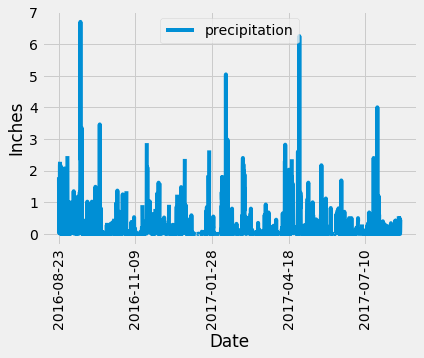

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
sel2 = [Measurement.date, Measurement.prcp]
prcpLY2 = session.query(*sel2).filter(Measurement.date > dt.date(2016,8,23)).all()
df2 = pd.DataFrame(prcpLY2, columns = ['date','precipitation'])
df2.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
session.query(func.count(Station.station)).all()

[(9,)]

In [12]:
# Design a query to calculate the total number stations in the dataset


[(9)]

In [31]:
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

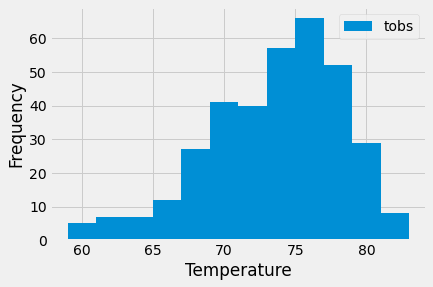

In [71]:
tobsLY = session.query(Measurement.tobs).filter(Measurement.date > dt.date(2016,8,23)).\
    filter(Measurement.station == 'USC00519281').all()
df3 = pd.DataFrame(tobsLY,columns=['tobs'])
plt.hist(df3,bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc=1, labels=['tobs'])
plt.show()

Text(0.5, -1.340000000000014, 'Temperature')

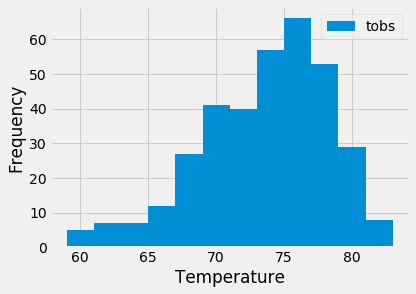

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [72]:
session.close()